------
# **ASSOCIATION RULES**
-------

### OBJECTIVE :

- Rule mining techniques, particularly focusing on market basket analysis and provide hands on experience

### DATA PREPROCESSING :

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import networkx as nx

In [8]:
from mlxtend.preprocessing import TransactionEncoder

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
df=pd.read_excel('Online retail.xlsx')

In [11]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


### ASSOCIATION RULE MINING :

In [13]:
df.columns=['Transaction']                            # Renames the DataFrame's column to "Transaction"

In [14]:
df['Transaction']=df['Transaction'].str.split(',')    # Splits the items in each transaction (a string) into a list

In [15]:
df

,Transaction
0,"[burgers, meatballs, eggs]"
1,[chutney]
2,"[turkey, avocado]"
3,"[mineral water, milk, energy bar, whole wheat ..."
4,[low fat yogurt]
...,...
7495,"[butter, light mayo, fresh bread]"
7496,"[burgers, frozen vegetables, eggs, french frie..."
7497,[chicken]
7498,"[escalope, green tea]"


In [16]:
df.dropna(inplace=True)                          # Removes any rows that contain NaN (missing) values       
df.drop_duplicates(inplace=True)                 # Removes duplicate transactions                            
df.shape                                                                       

(5175, 1)

In [17]:
te = TransactionEncoder()                                  # Creates an instance of TransactionEncoder for one-hot encoding 
te_=te.fit(df['Transaction']).transform(df['Transaction']) # Fits the encoder on transactions # list items into binary matrix

In [18]:
te

TransactionEncoder()

In [19]:
df_e=pd.DataFrame(te_,columns=te.columns_)    # Converts the one-hot encoded matrix into a DataFrame with column names   

In [20]:
df_e

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5171,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
5172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5173,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
all_items = set(item for sublist in df['Transaction'] for item in sublist) # Creates a set of all unique items
all_items 

{' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [22]:
min_s=0.05                                                       # Sets minimum support to 5%       
frequent_item=apriori(df_e,min_support=min_s,use_colnames=True)  # Finds frequent itemsets with support ≥ 5%
frequent_item

,support,itemsets
0,0.113816,(burgers)
1,0.103575,(cake)
2,0.054879,(champagne)
3,0.083865,(chicken)
4,0.205217,(chocolate)
5,0.060676,(cookies)
6,0.071884,(cooking oil)
7,0.208116,(eggs)
8,0.083865,(escalope)
9,0.192657,(french fries)


In [23]:
min_c=0.2                             # minimum confidence threshold (min_c) to 0.2 for filtering association rules
rules=association_rules(frequent_item, metric='confidence',min_threshold=min_c) # association rules from frequent itemsets
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.205217,0.299710,0.073237,0.356874,1.190730,0.011731,1.088884,0.201538
1,(mineral water),(chocolate),0.299710,0.205217,0.073237,0.244358,1.190730,0.011731,1.051798,0.228732
2,(chocolate),(spaghetti),0.205217,0.229565,0.055845,0.272128,1.185406,0.008735,1.058476,0.196793
3,(spaghetti),(chocolate),0.229565,0.205217,0.055845,0.243266,1.185406,0.008735,1.050280,0.203012
4,(eggs),(mineral water),0.208116,0.299710,0.070145,0.337047,1.124578,0.007770,1.056320,0.139891
5,(mineral water),(eggs),0.299710,0.208116,0.070145,0.234043,1.124578,0.007770,1.033849,0.158188
6,(eggs),(spaghetti),0.208116,0.229565,0.051401,0.246982,1.075870,0.003625,1.023130,0.089053
7,(spaghetti),(eggs),0.229565,0.208116,0.051401,0.223906,1.075870,0.003625,1.020345,0.091532
8,(frozen vegetables),(mineral water),0.129855,0.299710,0.050435,0.388393,1.295895,0.011516,1.144999,0.262407
9,(ground beef),(mineral water),0.135845,0.299710,0.058744,0.432432,1.442835,0.018030,1.233844,0.355168


### ASSOCIATION RULE MINING :

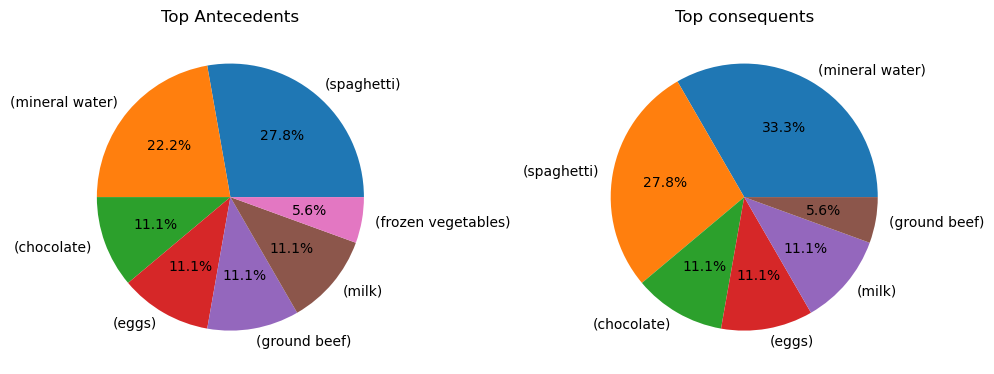

In [60]:
plt.figure(figsize=(10,10))
antecedents_counts = rules['antecedents'].value_counts().head(20)
plt.subplot(1,2,1)
antecedents_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Antecedents')
plt.ylabel('')

consequents_counts = rules['consequents'].value_counts().head(20) 
plt.subplot(1,2,2)
consequents_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top consequents')
plt.ylabel('')
plt.tight_layout()
plt.show()

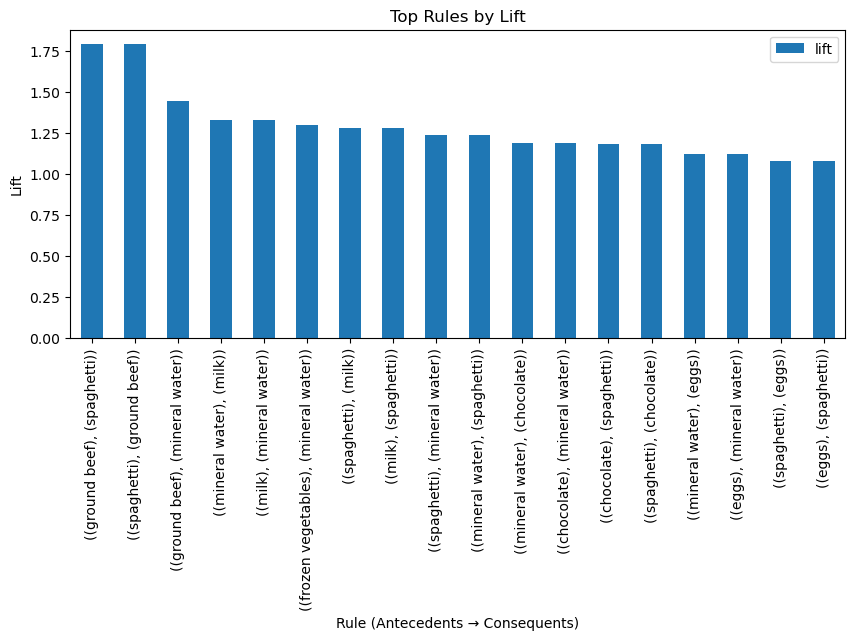

In [26]:
top_rules = rules.nlargest(20, 'lift')

top_rules[['antecedents', 'consequents', 'lift']].set_index(['antecedents', 'consequents']).plot(kind='bar', figsize=(10, 4))
plt.title('Top Rules by Lift')
plt.xlabel('Rule (Antecedents → Consequents)')
plt.ylabel('Lift')
plt.xticks(rotation=90)
plt.show()

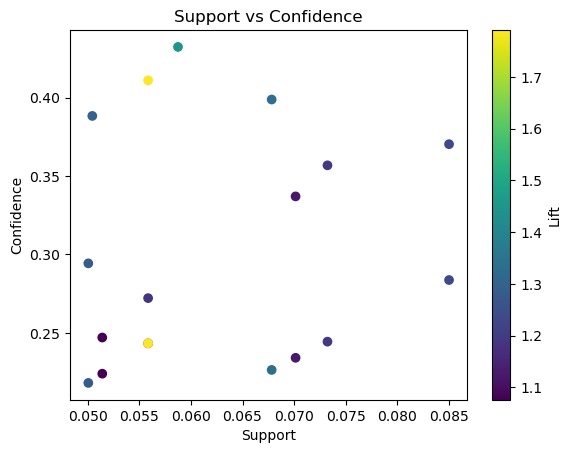

In [27]:
plt.scatter(rules['support'], rules['confidence'], alpha=1, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

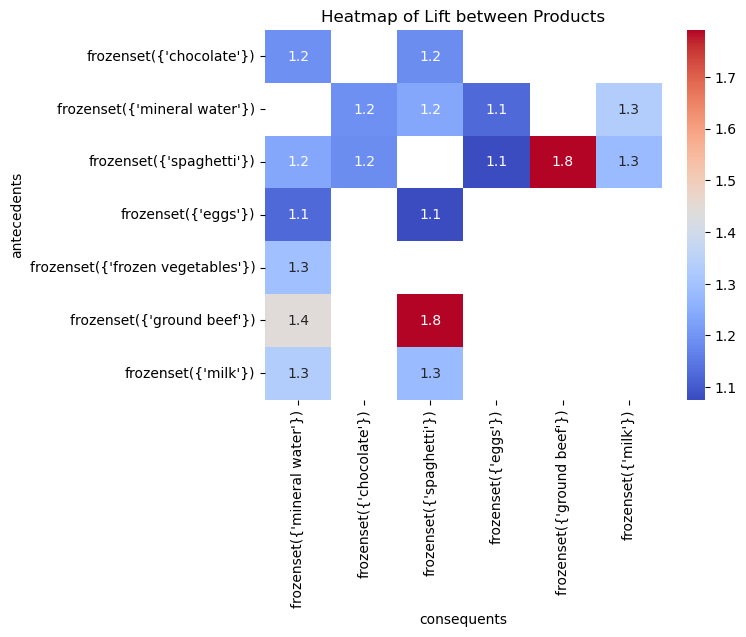

In [28]:
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Heatmap of Lift between Products')
plt.show()

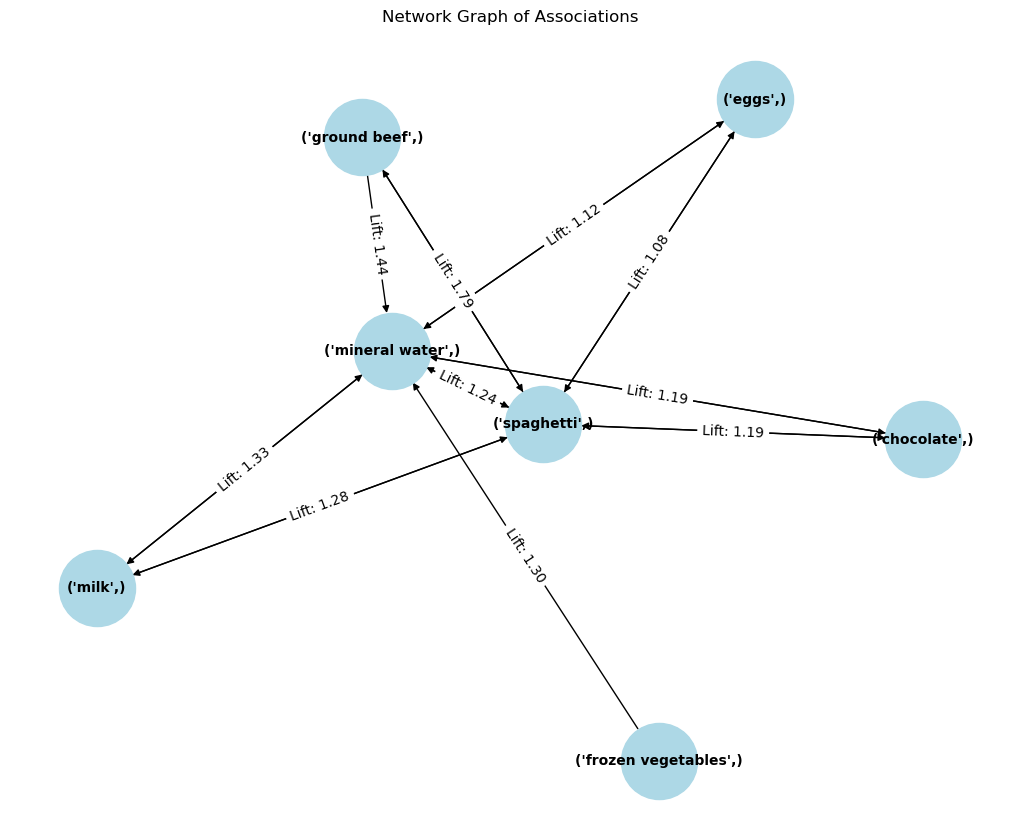

In [29]:
G = nx.DiGraph()                  # Initialize a directed graph for visualizing associations

for i, rule in rules.iterrows():  # Add edges to the graph for each rule, using lift as the edge weight   
    G.add_edge(tuple(rule['antecedents']), tuple(rule['consequents']), weight=rule['lift'])

plt.figure(figsize=(10, 8))       
pos = nx.spring_layout(G, k=2)    # Generate positions for the nodes in the graph using a spring layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold') #draw accordingly
edge_labels = {(tuple(rule.antecedents), tuple(rule.consequents)): f"Lift: {rule.lift:.2f}" for rule in rules.itertuples()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Network Graph of Associations')
plt.show()

- Customer Behavior Patterns :
  * Frequent pairing of "spaghetti" with "ground beef" shows meal-specific purchases
  * "Mineral water" is often bought with essentials like "milk" and " spaghetti "
  * "Chocolate" is commonly paired with staple items, indicating impulse buys
  * Customers mix essentials across categories (e.g., "eggs" and "mineral water")

- UNDERSTANDINGS :
  * Create meal-based bundles (e.g, pasta and beef)
  * Suggest related items during purchases (e.g., suggest "ground beef" with "spaghetti")
  * Place frequently bought-together items near each other
  * Customers mix essentials across categories (e.g., "eggs" and "mineral water")
  * Stock up on items frequently bought together to prevent stockouts

--------
##  INTERVIEW QUESTIONS :

(1) What is lift and why is it important in Association rules  ?

(2) What is Support and Confidence? How to Calculate Them?

(3) Limitations or Challenges of Association Rule Mining